/home/vagrant/jupyter/TEST/Zgoubi-Workshop/Tutorials/Monday/TutMo2/Ex-3-SpinRes


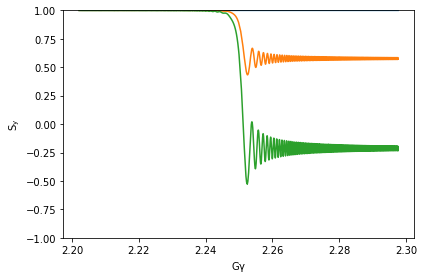

alfa=1.5206x10^6
 
epsilon_k(1)=0.000000

epsilon_k(2)=0.000601

epsilon_k(3)=0.001191



In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
FL=os.getcwd()
print FL
Energy,Mass,G,SY,SX,SZ,IREP=np.loadtxt('%s/%s'%(FL,'zgoubi.fai'),skiprows=2,usecols=(24,28,30,21,20,19,26),unpack=True)
Ggamma=G*Energy/Mass
IREP_max=np.int(np.max(IREP))
index_1=np.where(IREP==1)[0]
plt.figure()
for i in range(0,IREP_max):
    plt.plot(Ggamma[np.add(index_1,i)],SY[np.add(index_1,i)])
plt.ylim([-1.05,1.05])
plt.ylabel(r'$\rm S_y$')
plt.xlabel(r'$\rm G\gamma$')
plt.tight_layout()
plt.savefig('PSR_SPNTRK.eps',format='eps')
plt.show()

P_i=1
P_f=[]
epsilon_k=[]
#Calculate the change in energy per turn
del_E=np.diff(Energy[index_1])[0]
#Crossing speed (change in G gamma per change delta theta)
alfa=G[0]*del_E/(Mass[0]*2*np.pi)
for i in range(0,IREP_max):
    P_f.append(np.sum(SY[np.add(index_1,i)][-1000:])/1000)
    epsilon_k.append((-alfa*np.log(((P_f[i]/P_i)+1)/2))**0.5)


print 'alfa=%.4fx10^6\n '%(alfa*10**6)
ct=0
for i in epsilon_k:
    ct+=1
    print 'epsilon_k(%i)=%.6f\n'%(ct,i)
